In [503]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np

#Import image
impatch = "Tol4-1 high.tiff"
im = Image.open(impatch)

#Set to array
imarray = np.array(im)

(1024, 1024, 3)


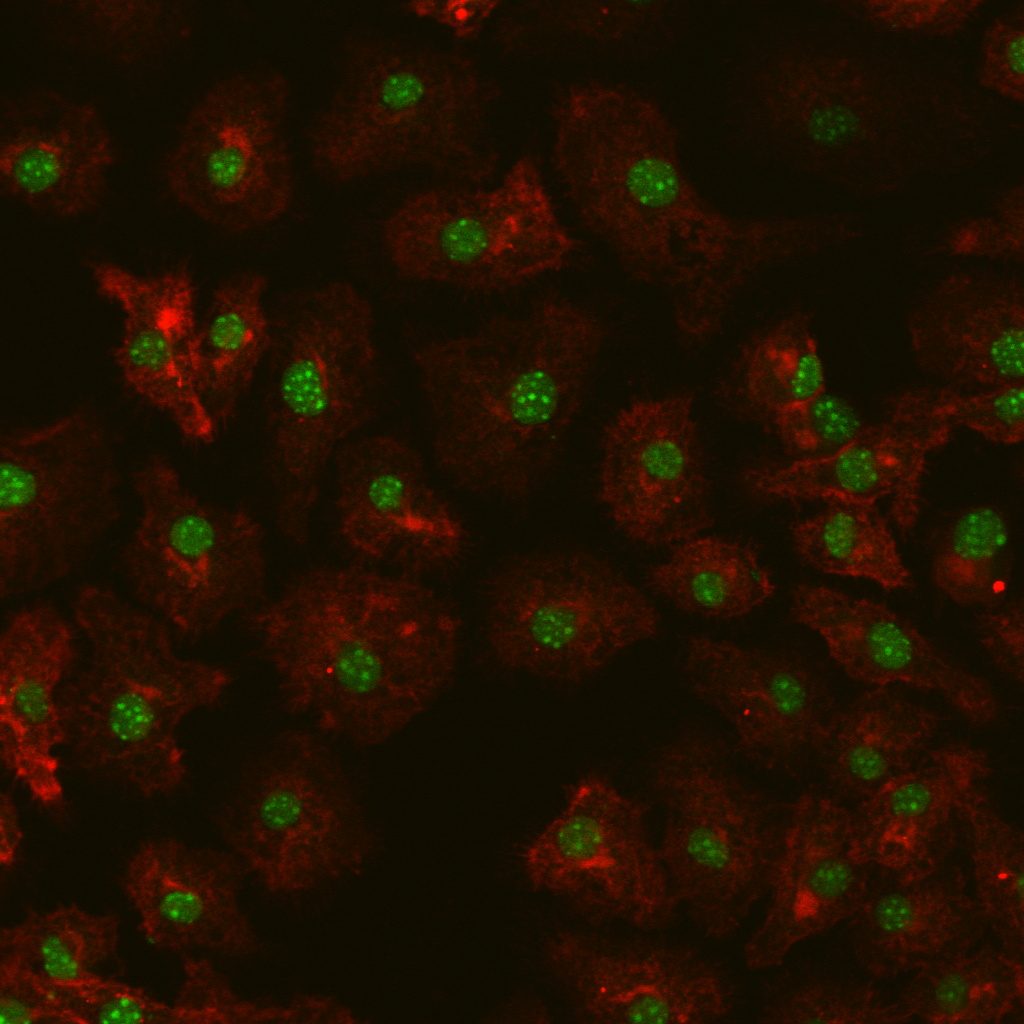

In [504]:
#Show array shape&image
print(imarray.shape)
Image.fromarray(imarray)

(55941,)
65.41690352335496
3659487
(1024, 2050, 3)


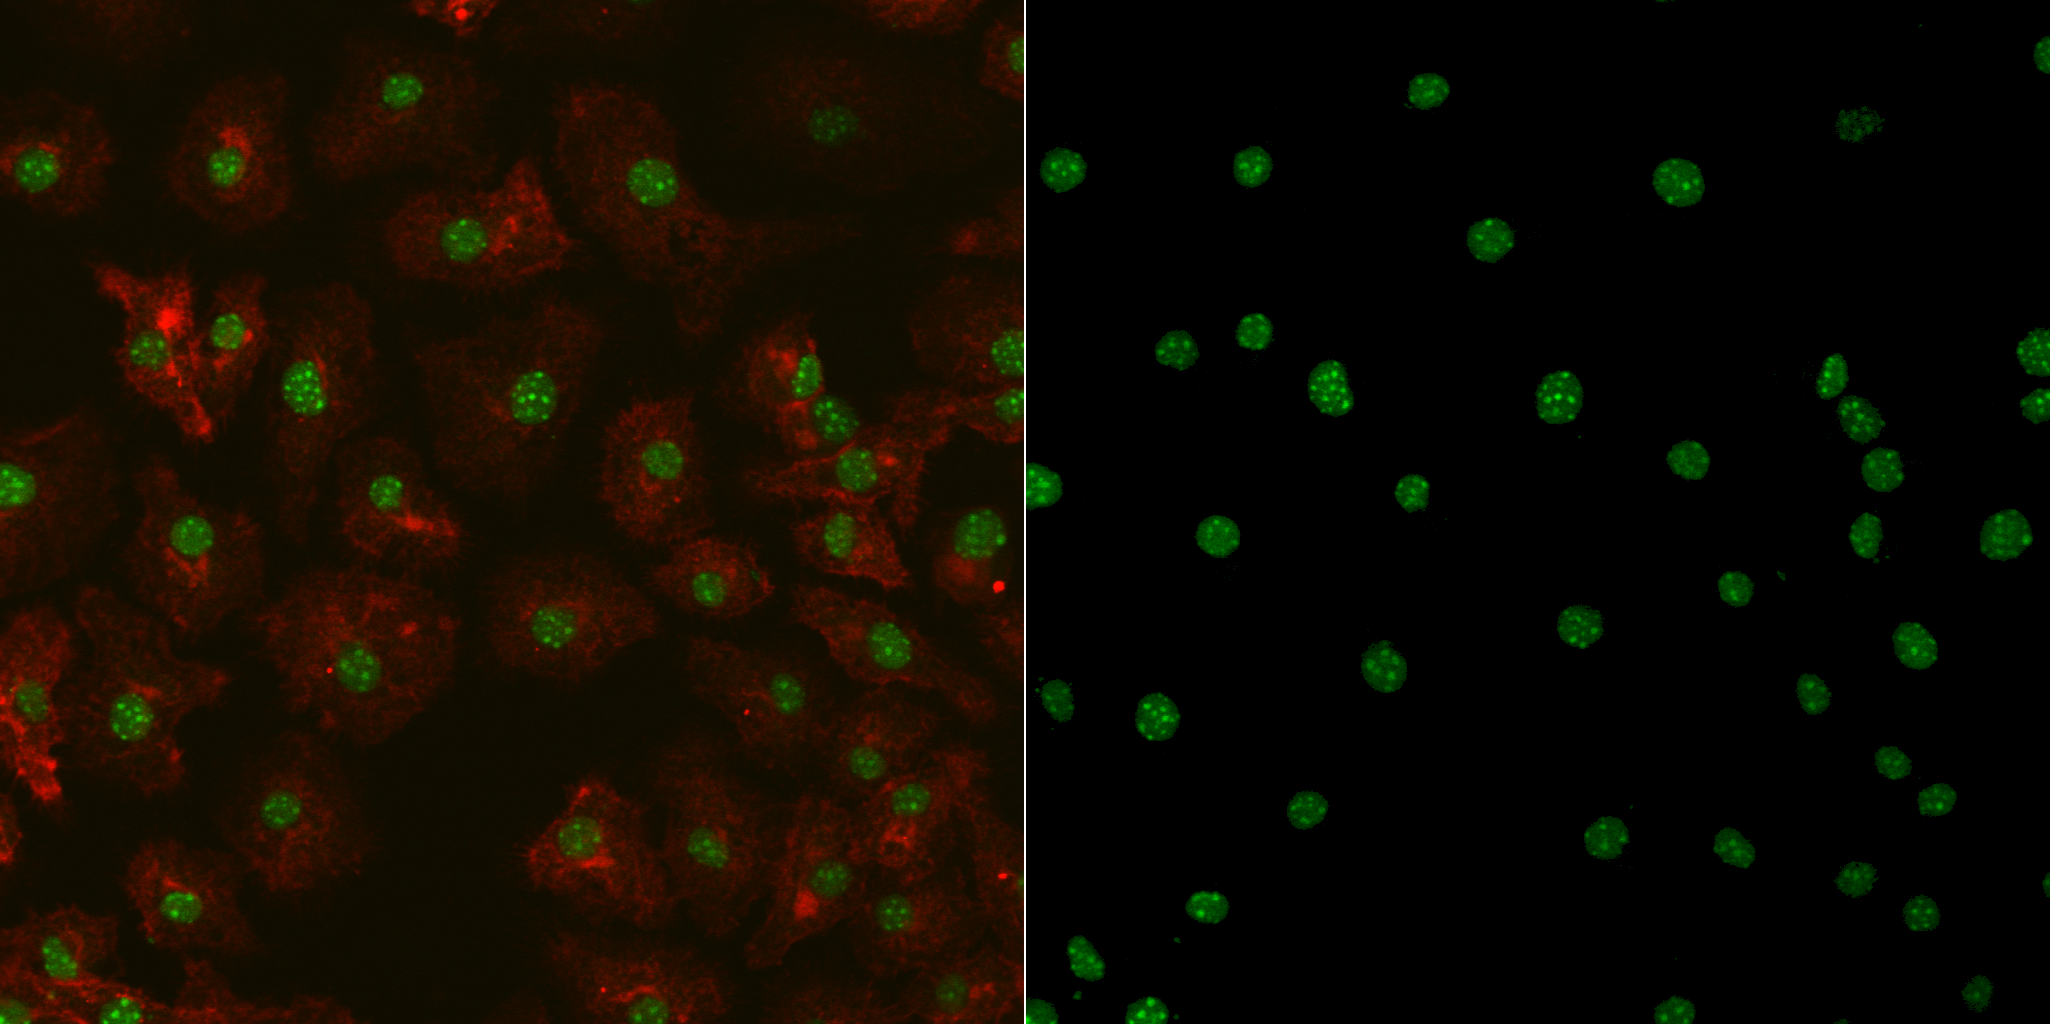

In [505]:
#Delete R B color
gimarray = imarray.copy()
gimarray[:, :, 0] = 0
gimarray[:, :, 2] = 0

#Fillter noise
gimarray[gimarray < 30] = 0

#Split G color array
gareaimarray = gimarray[:, :, 1]
cvgareaimarray = gareaimarray.copy() #Bufer for cv process

#Calculate intentsive of green area
gareaimarray = gareaimarray[gareaimarray > 0]
print(gareaimarray.shape)
print(gareaimarray.mean())
print(gareaimarray.sum())

#combine 2 image
imarray = np.concatenate((imarray, np.full((1024, 2, 3), 255, dtype="uint8"), gimarray), axis=1)
print(imarray.shape)
Image.fromarray(imarray)

In [506]:
#Draw text in photo
Finalim = Image.fromarray(imarray)
draw = ImageDraw.Draw(Finalim)
font = ImageFont.truetype('Montserrat-Black.ttf', 40)
draw.text((5, 5), str(gareaimarray.mean().round(2)), (255,255,255), font=font)

#Save image
Finalim.save("Split" + impatch[:-5] + ".jpg")

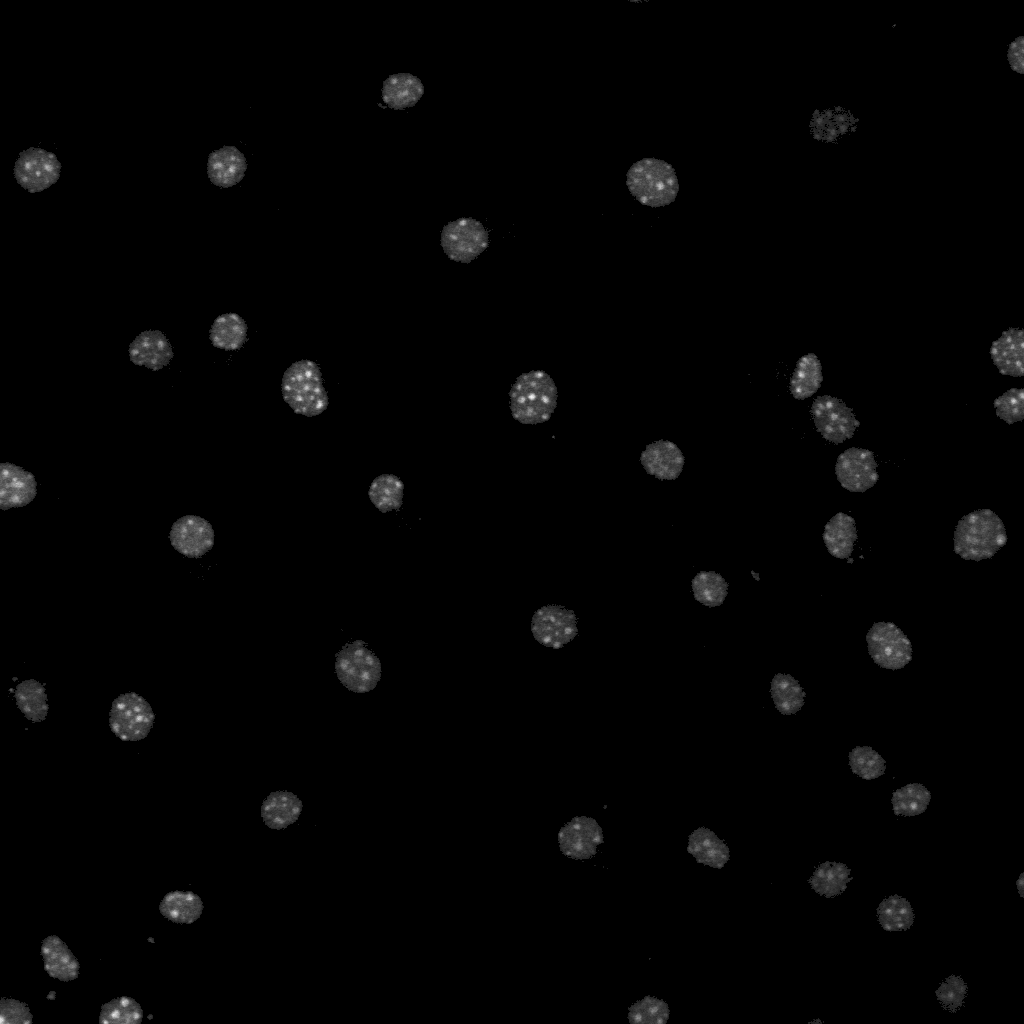

In [507]:
Image.fromarray(cvgareaimarray)

39
[[[ 191.5  535.5   21.6]
  [ 581.5  837.5   21.6]
  [ 977.5  535.5   24.3]
  [  34.5  170.5   20.8]
  [ 308.5  386.5   28. ]
  [ 649.5  180.5   22.7]
  [ 533.5  395.5   23.9]
  [ 130.5  716.5   23.8]
  [ 555.5  626.5   21.6]
  [ 856.5  469.5   21.4]
  [ 405.5   89.5   17.2]
  [ 662.5  460.5   20.2]
  [ 359.5  666.5   25.2]
  [  17.5  487.5   19.1]
  [ 225.5  167.5   19.6]
  [ 894.5  913.5   17.7]
  [ 186.5  908.5   14.5]
  [ 279.5  809.5   18.3]
  [ 143.5  351.5   15.2]
  [ 225.5  331.5   15.2]
  [ 806.5  378.5   15.2]
  [ 841.5  527.5   14.4]
  [ 386.5  494.5   17.4]
  [ 891.5  649.5   20.2]
  [ 707.5  588.5   18.1]
  [ 464.5  238.5   22.1]
  [ 911.5  797.5   17.2]
  [ 835.5  423.5   18. ]
  [  58.5  961.5   16.3]
  [  29.5  699.5   19.9]
  [ 827.5  127.5   14.1]
  [ 827.5  879.5   16.5]
  [ 714.5  851.5   14.7]
  [ 787.5  692.5   16. ]
  [ 866.5  757.5   18.8]
  [ 120.5 1020.5   21.8]
  [1010.5  359.5   17.4]
  [1011.5  407.5   15. ]
  [ 950.5  985.5   18. ]]]


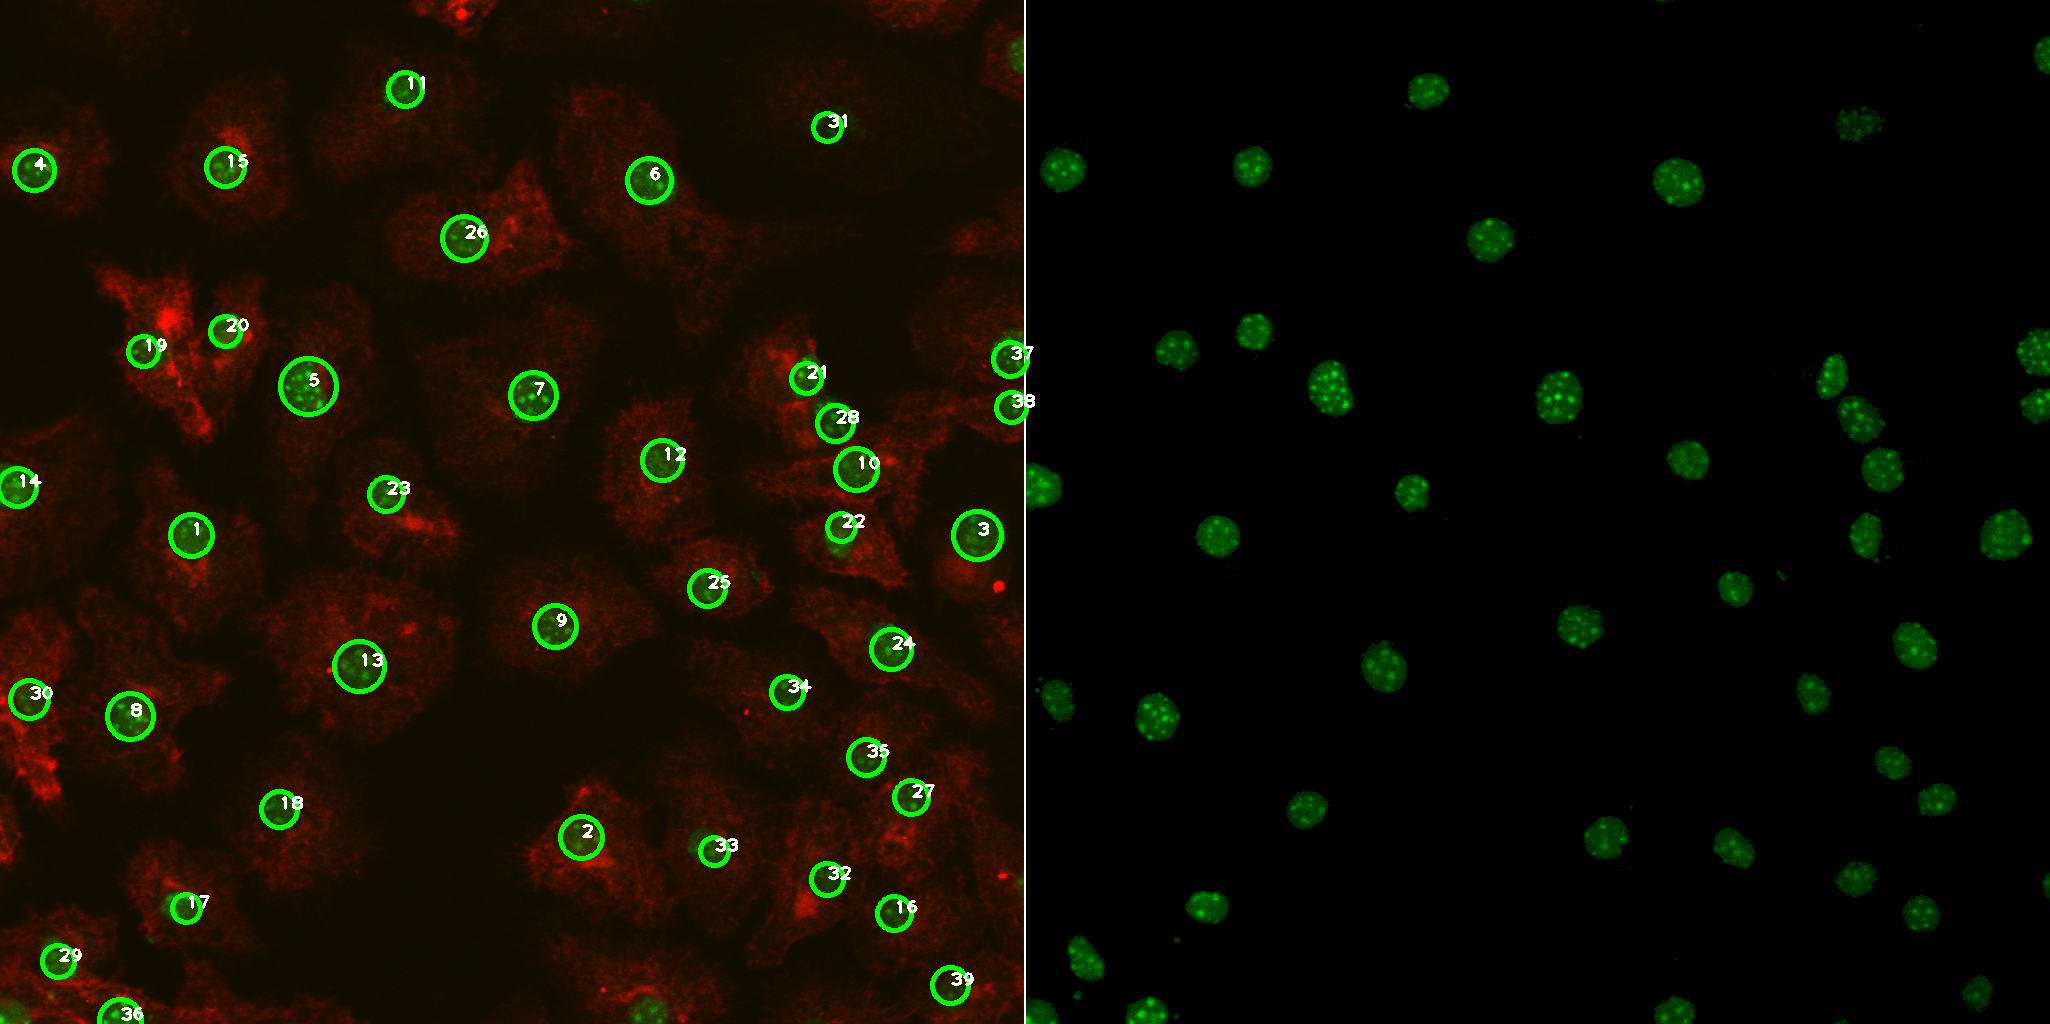

In [508]:
import cv2

circles = cv2.HoughCircles(cvgareaimarray,
                           cv2.HOUGH_GRADIENT,
                           minDist=35,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=12,
                           maxRadius=30)
print(circles.shape[1])
print(circles)

i = 0
for (x, y, r) in circles[0, :, :]:
    i = i + 1
    cv2.circle(imarray, (x, y), r, (0, 255, 0), 4)
    cv2.putText(imarray,str(i), (x,y), cv2.FONT_HERSHEY_PLAIN, fontScale=1.2,
                color=(255, 255, 255), thickness=2)
    
Image.fromarray(imarray)